## Model building<a class="anchor" id ="steps"></a>
### steps
[Logistic regression](#step1)<br>
[Decision tree classifier](#step2)<br>
[Random Forest](#step3)<br>


#### Data Dictionary
>-The data set includes information about:Churn: If customers left within the last month or not
>- Services that each customer has signed up for, including phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>- Customer account information, including tenure (how long they’ve been a customer), contract, payment method, paperless billing, monthly charges, and total charges
>- Demographic information about customers, including gender, age range, and if they have partners and dependents

In [3]:
import pandas as pd
telcom_data = pd.read_csv('Telco-Customer-Churn.csv')
telcom_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
#check missing values, dtypes and number of entries
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


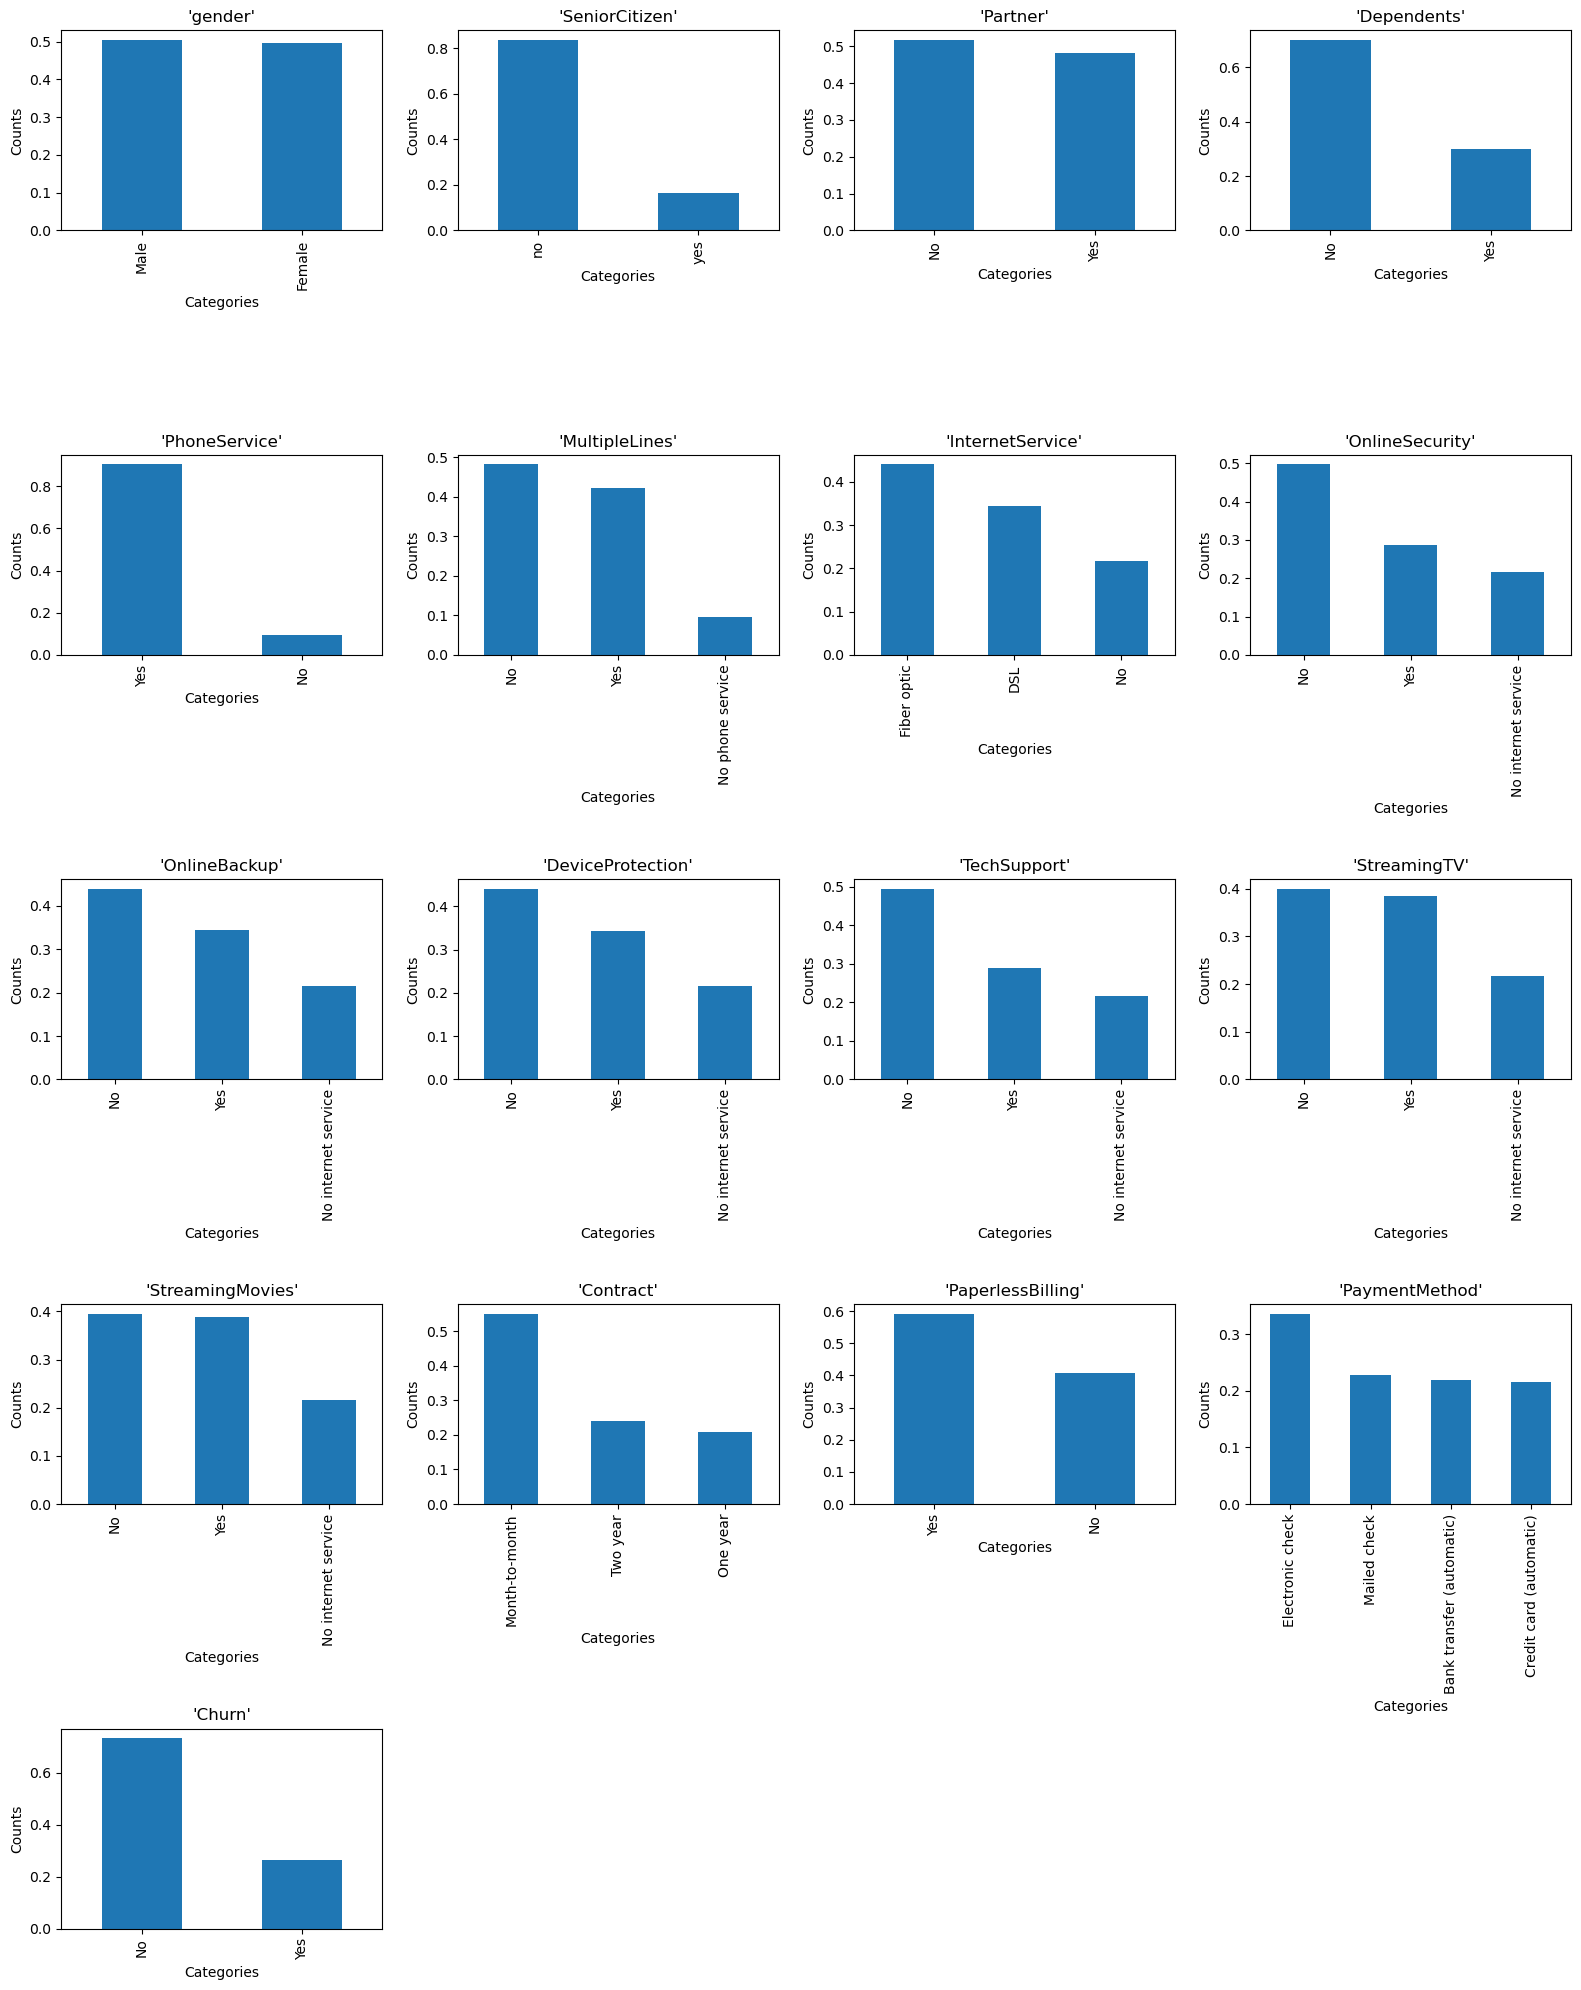

In [5]:
#check cardinality, value counts and balance
import matplotlib.pyplot as plt

# Select object columns
object_columns = telcom_data.select_dtypes('object').columns

# Define the number of rows and columns for the grid
n_cols = 4  # Number of columns in the grid
n_rows = (len(object_columns) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot each variable
for i, col in enumerate(object_columns):
    telcom_data[col].value_counts(normalize =True).plot(kind='bar', ax=axes[i], title=f"'{col}'")
    axes[i].set_xlabel("Categories")
    axes[i].set_ylabel("Counts")

# Hide any unused subplots
for i in range(len(object_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


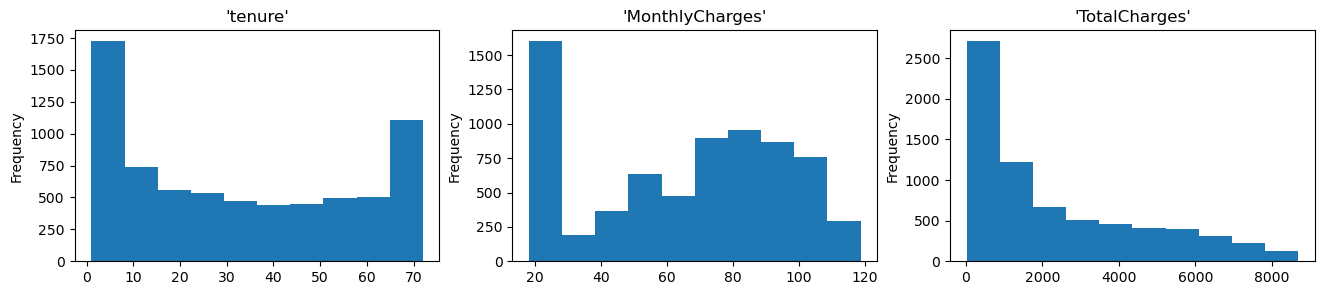

In [6]:
# distribution of the number columns
number_columns = telcom_data.select_dtypes('number')
n_cols = 3  # Number of columns in the grid
n_rows = 1
fig, axes = plt.subplots( n_rows,n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(number_columns):
    telcom_data[col].plot(kind = 'hist', ax=axes[i],title=f"'{col}'");
plt.show()

In [11]:
#wrangle function
def wrangle(data):
    # Make a copy to avoid modifying the original dataset
     df = data.copy()
    #encode our target variable
     df['Churn'] = (df['Churn']=='Yes').astype(int)
    #drop column with multicollinearity
     df.drop(columns = 'TotalCharges', inplace = True)
    
     return df
    

In [13]:
df = wrangle(telcom_data)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0


### model building(logistic regression)<a class="anchor" id="step1"></a>
[go_back_up](#steps)

In [21]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop(columns='Churn')  # All features except 'Churn'
y = df['Churn']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns (assuming these are object types)
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Build the pipeline with ColumnTransformer and LogisticRegression
model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_columns),# OneHotEncoder for categorical columns
            ('num', StandardScaler(),numerical_columns)
        ]
    )),
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on test data
predictions = model.predict(X_train)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training set:", accuracy_score(y_train, predictions))


Accuracy on training set: 0.8055111111111111


In [23]:
#baseline accuracy
#a naive model predicts one value over and over
#because we have only two classes, it either predicts 1 or 0
#remember class 1 has about 73% value counts
#so if our model predicts only class 1 it will be 73% right all the time compared to predicting class o
# so our baseline accuracy is going to be 73%
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.73


## communicate results

In [25]:
#check for overfitting or underfitting
acc_train = accuracy_score(model.predict(X_train),y_train)
acc_test = accuracy_score(model.predict(X_test),y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.81
Test Accuracy: 0.79


In [29]:
import numpy as np
#extract feature names and importances
#get categorical feature names
cat_feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
#get numerical feature names
num_feature_names = X_train.select_dtypes(include=['number']).columns
#Combine both categorical and numerical feature names
all_feature_names = np.concatenate([cat_feature_names, num_feature_names])
#extract coefficients
importances = model.named_steps['classifier'].coef_[0]
#create a series of coefficients with feature names as the index
feat_imp = pd.Series(np.exp(importances), index=all_feature_names ).sort_values()
feat_imp.head()

tenure                 0.427546
Contract_Two year      0.500645
InternetService_DSL    0.558702
PaperlessBilling_No    0.767654
SeniorCitizen_no       0.770095
dtype: float64

In [31]:
#calculate the odds ratio
odds_ratios = pd.Series(np.exp(importances), index=all_feature_names ).sort_values()
odds_ratios.head()

tenure                 0.427546
Contract_Two year      0.500645
InternetService_DSL    0.558702
PaperlessBilling_No    0.767654
SeniorCitizen_no       0.770095
dtype: float64

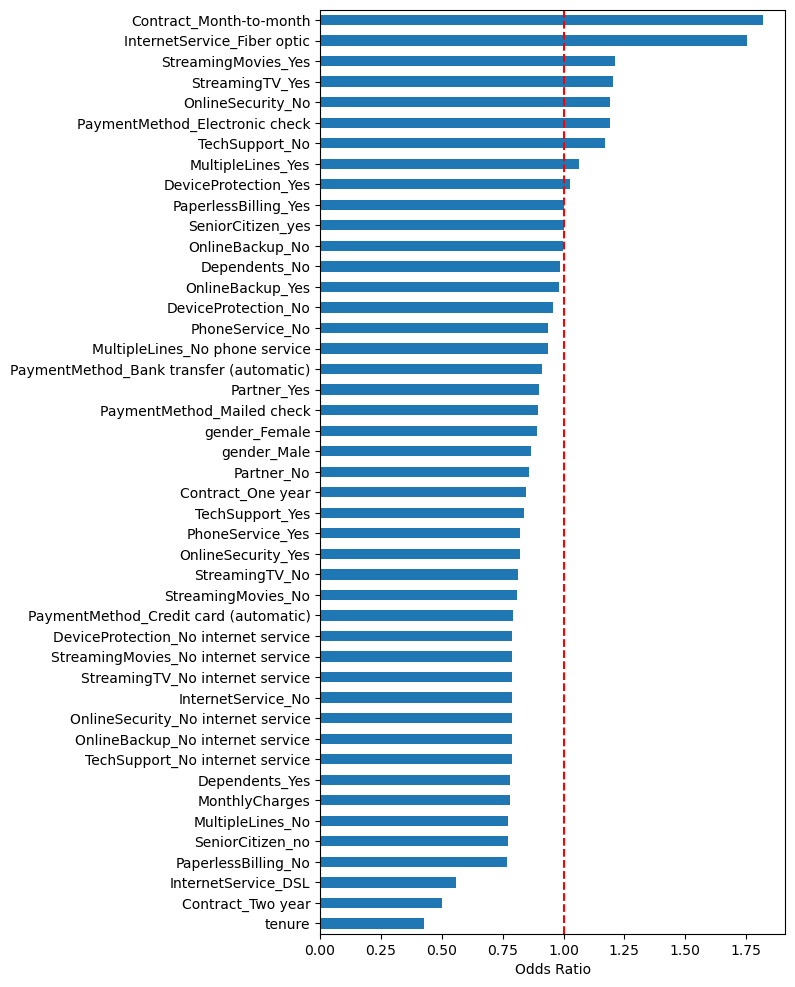

In [33]:
#visualize the odds ratio
odds_ratios.plot(kind= 'barh',figsize= (6,12))
plt.axvline(x=1, linestyle ='--', color = 'red')
plt.xlabel('Odds Ratio');

### actionable insight from the odds ratio plot
>- To reduce churn, focus on improving the experience for customers with month-to-month contracts and those with fiber optic internet service, 
as they have the highest likelihood of churning.
>- This is important because customers who are on more flexible or high-end services might be more likely to leave once they reach a certain threshold.
>- prioritize features with low odds ratios like Contract_Two year
>- which aligns with the idea that customers who are more invested in the service (either by spending more or committing for longer) are less likely to churn.
>- Payment method seems to be an important feature, with those using automatic payments being less likely to churn

In [53]:
predictions = model.predict(X_test)
predictions[:5]

array([0, 0, 1, 0, 0])

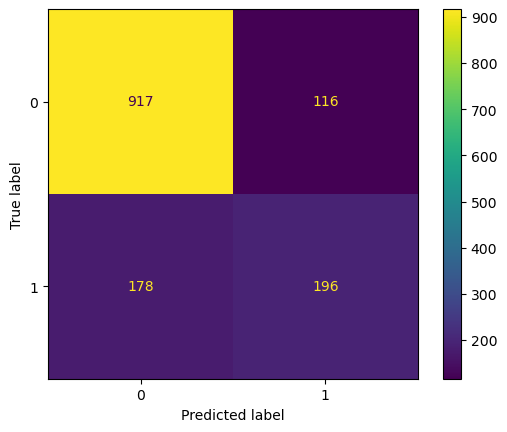

In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [57]:
#check other metrics
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



## interpretation of confusion matrix
>- Precision (63%): Out of all the customers predicted to churn, 65.6% actually churned.
>- Recall (52%): The model identified 48.9% of all actual churners, missing the rest.
>- F1 Score (57%): This balances precision and recall, showing moderate performance overall.
>- we are see the model performing better on the majority class
### In summary:
>- Precision is fairly good, indicating that most predicted churners are indeed churners.
>- Recall is lower, meaning the model misses a significant portion of actual churners.
>- The F1 score suggests that there's room for improvement, particularly in reducing the number of false negatives.

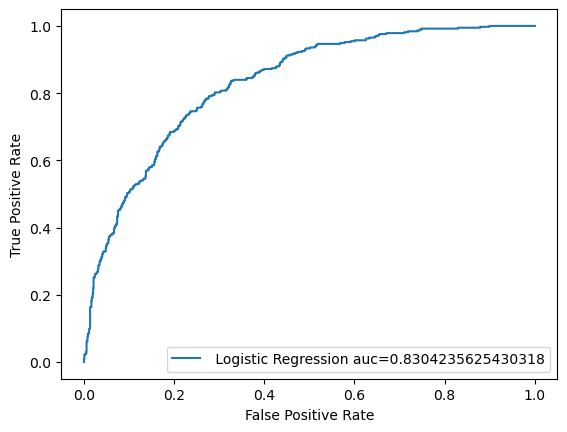

In [60]:
#area under the curve
from matplotlib import pyplot
import sklearn.metrics as metrics

#keep probabilities for the positive outcome only
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

### model building(decision tree classifier)<a class="anchor" id="step2"></a>
[go_back_up](#steps)

In [56]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges_sqrt
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,5.463515
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,43.468379


In [67]:
#model building
#model building
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


# Split data into features (X) and target (y)
X = df.drop(columns='Churn')  # All features except 'Churn'
y = df['Churn']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split training set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the categorical columns (assuming these are object types)
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Build the pipeline with ColumnTransformer and decision tree
#adding the agrument of class weiight='balanced' becasue the model was performing poorly on once class
tree = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), categorical_columns),# OrdinalEncoder for categorical columns
            ('num', StandardScaler(),numerical_columns)
            
        ]
    )),
    ('classifier',  DecisionTreeClassifier(class_weight="balanced",random_state = 42))  # tree model
])

# Fit model to training data
tree.fit(X_train, y_train)

# Make predictions on test data
predictions = tree.predict(X_train)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training set:", accuracy_score(y_train, predictions))

Accuracy on training set: 0.998


In [69]:
# Evaluate the model's accuracy on validation set
print("Accuracy on validation set:", tree.score(X_val, y_val))

Accuracy on validation set: 0.7146666666666667


In [71]:
# we see that our model is overfitting typical of decision trees
# training sccuracy of 1 vs validation accuracy of 0.7 and baseline of 0.73
# we will cut the depth of the tree but first we findout out the tree depth
tree_depth = tree.named_steps['classifier'].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 27


### Tree pruning

In [73]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {"classifier__max_depth": range(1,28,2),"classifier__ccp_alpha": (0.01, 0.1, 1, 10)}

model_grid_search = GridSearchCV(tree, param_grid=param_grid, n_jobs=2, cv=2)
model_grid_search.fit(X_train, y_train)

#extract best parameters
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The best set of parameters is: {'classifier__ccp_alpha': 0.01, 'classifier__max_depth': 3}


In [75]:
#our model after hyperparameter tuning
# Build the pipeline with ColumnTransformer and decision tree
#adding the agrument of class weiight='balanced' becasue the model was performing poorly on once class
tree_grid = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), categorical_columns),# OrdinalEncoder for categorical columns
            ('num', StandardScaler(),numerical_columns)
            
        ]
    )),
    ('classifier',  DecisionTreeClassifier(max_depth =3, ccp_alpha = 0.01,class_weight="balanced",random_state = 42))  
])

# Fit model to training data
tree_grid.fit(X_train, y_train)

# Make predictions on test data
predictions = tree_grid.predict(X_train)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training set:", accuracy_score(y_train, predictions))
# Evaluate the model's accuracy on validation set
print("Accuracy on validation set:", tree_grid.score(X_val, y_val))

Accuracy on training set: 0.7462222222222222
Accuracy on validation set: 0.7484444444444445


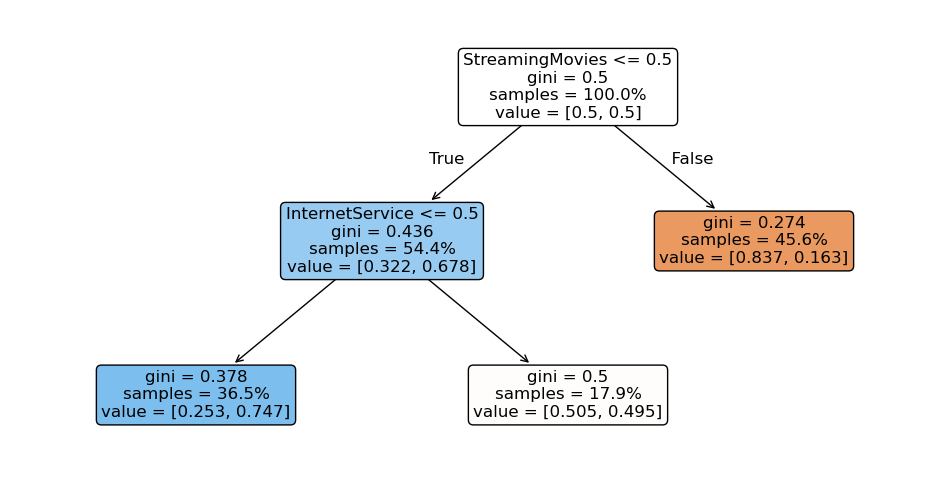

In [77]:
#after hyperparameter tuning we see our model perfoms better with 0.746(training) and 0.748(validation)
#visualize the tree
# Create larger figure
fig, ax = plt.subplots(figsize=(12, 6))
# Plot tree
plot_tree(
    decision_tree= tree_grid.named_steps['classifier'],
    feature_names= X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

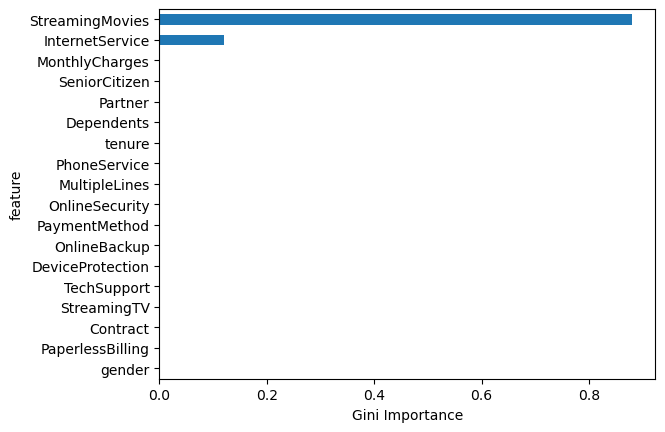

In [79]:
#extract feature importances
features = X_train.columns
importances = tree_grid.named_steps['classifier'].feature_importances_
#create a series
feat_imp = pd.Series(importances, index =features )
# Create horizontal bar chart
feat_imp.sort_values().plot(kind ='barh')
plt.xlabel('Gini Importance')
plt.ylabel('feature');

### testing the model

In [81]:
#test accuracy
test_acc = tree_grid.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.72


In [83]:
#check other metrics
from sklearn.metrics import classification_report
predictions = tree_grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1033
           1       0.49      0.71      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.72      0.74      1407



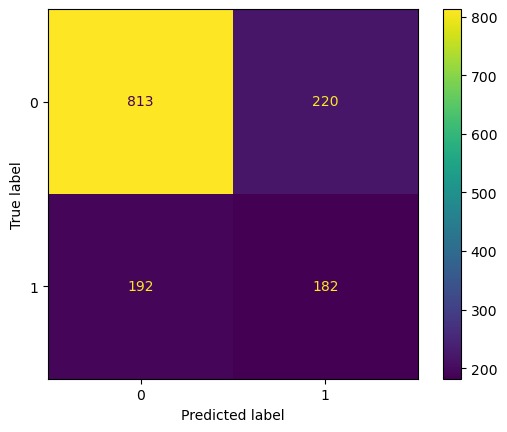

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = tree.predict(X_test)
cm = confusion_matrix(y_test,predictions, labels= tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= tree.classes_)
disp.plot()
plt.show()

### Observations:
>- The model performs significantly better for class 0 compared to class 1, as seen in the precision, recall, and F1-score values.
>- Class imbalance may be affecting the performance for class 1, which has fewer samples (374) compared to class 0 (1033).
>- The overall accuracy is 72%, but the low precision for class 1 suggests many false positives for that class.

### model comparison
### logistic regression
>- Strengths: High accuracy and good performance for the majority class (non-churners).
>- Weaknesses: Recall for churners (class 1) is low, meaning many churners are missed.
### decision tree
>- Strengths: Better recall for churners (class 1), identifying more actual churners than Logistic Regression.
>- Weaknesses: Lower precision and accuracy compared to Logistic Regression, meaning more false positives and overall misclassifications.
### Recommendations
>- If identifying as many churners as possible is the goal, the Decision Tree is better because of its higher recall for churners.
>- If minimizing false positives for churners is more important, Logistic Regression is a better choice.
### To improve either model:
>- Address class imbalance (e.g., use SMOTE, class weighting, or oversampling).
>- Hyperparameter tuning:
>- For Logistic Regression, adjust the decision threshold to balance precision and recall.
>- For Decision Tree, tune parameters like max_depth, min_samples_split, and min_samples_leaf.
>- Try ensemble models like Random Forests or Gradient Boosted Trees, which may combine the strengths of both models.

### Ensemble methods
### Random Forest<a class="anchor" id="step3"></a>
[go_back_up](#steps)

In [94]:
#model before hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
forest = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), categorical_columns),# OrdinalEncoder for categorical columns
            ('num', StandardScaler(),numerical_columns)
            
        ]
    )),
    ('classifier',  RandomForestClassifier(n_estimators = 100, random_state = 42))  
])

# Fit model to training data
forest.fit(X_train, y_train)

# Make predictions on test data
predictions = forest.predict(X_train)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training set:", accuracy_score(y_train, predictions))
# Evaluate the model's accuracy on validation set
print("Accuracy on validation set:", forest.score(X_val, y_val))

Accuracy on training set: 0.9984444444444445
Accuracy on validation set: 0.7813333333333333


In [96]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {"classifier__n_estimators": [50,100,200],"classifier__max_depth": [10,20,None]}

forest_grid_search = GridSearchCV(forest, param_grid=param_grid, n_jobs=2, cv=2)
forest_grid_search.fit(X_train, y_train)

#extract best parameters
print(f"The best set of parameters is: {forest_grid_search.best_params_}")

The best set of parameters is: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}


In [118]:
#model after tuning
forest_grid = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), categorical_columns),# OrdinalEncoder for categorical columns
            ('num', StandardScaler(),numerical_columns)
            
        ]
    )),
    ('classifier',  RandomForestClassifier(n_estimators = 200,max_depth = 10, random_state = 42))  
])

# Fit model to training data
forest_grid.fit(X_train, y_train)

# Make predictions on test data
predictions = forest_grid.predict(X_train)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training set:", accuracy_score(y_train, predictions))
# Evaluate the model's accuracy on validation set
print("Accuracy on validation set:", forest_grid.score(X_val, y_val))

Accuracy on training set: 0.8991111111111111
Accuracy on validation set: 0.7955555555555556


### testing the model

In [120]:
#test accuracy
test_acc = forest_grid.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.79


In [122]:
#check other metrics
#classification_report
predictions = forest_grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



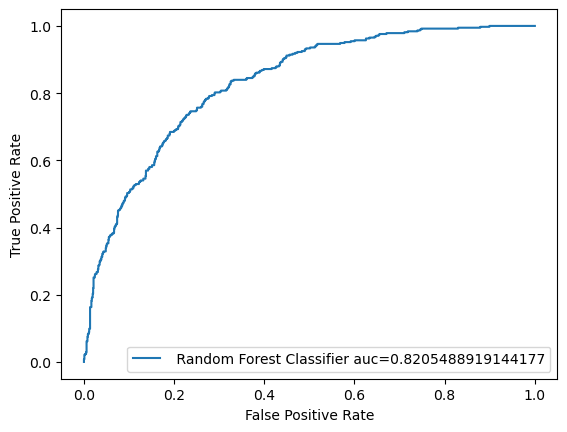

In [124]:
y_pred_proba_forest = forest_grid.predict_proba(X_test)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test, y_pred_proba_forest)
pyplot.plot(fpr,tpr,label=" Random Forest Classifier auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()


## next seps
>- Try SMOTE for oversampling.
>- Use class_weight='balanced' in RandomForest.
>- Lower the decision threshold (e.g., 0.4).
>- Remove unnecessary features & re-train.